In [43]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
df=pd.read_csv(r"D:\Cases\Vehicle_Silhouettes\Vehicle.csv")
df.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [13]:
x,y=df.drop('Class',axis=1),df['Class']
x.shape,y.shape


((846, 18), (846,))

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [15]:
lr=LinearDiscriminantAnalysis()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.90      0.97      0.93        65
        opel       0.58      0.67      0.62        39
        saab       0.74      0.53      0.61        59
         van       0.89      1.00      0.94        49

    accuracy                           0.80       212
   macro avg       0.78      0.79      0.78       212
weighted avg       0.79      0.80      0.79       212



In [17]:
q=QuadraticDiscriminantAnalysis()
q.fit(X_train,y_train)
y_pred=q.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.98      0.98      0.98        65
        opel       0.77      0.77      0.77        39
        saab       0.84      0.80      0.82        59
         van       0.94      1.00      0.97        49

    accuracy                           0.90       212
   macro avg       0.88      0.89      0.89       212
weighted avg       0.89      0.90      0.90       212



In [20]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [32]:
x,y=df.drop('species',axis=1),df['species']
X_train,X_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=25)

In [33]:
lr=LinearDiscriminantAnalysis()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.92      0.92      0.92        12
   virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [34]:
print(confusion_matrix(y_test,y_pred))

[[13  0  0]
 [ 0 11  1]
 [ 0  1 12]]


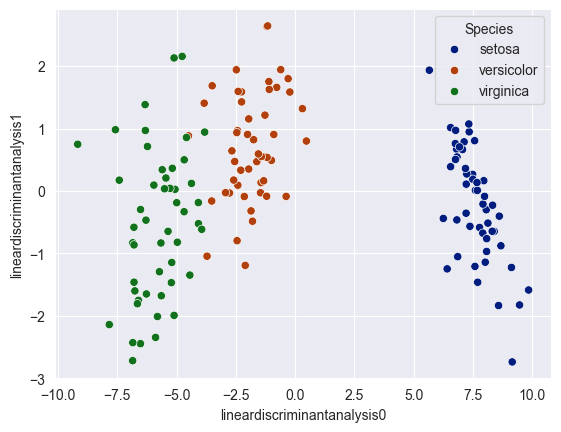

In [60]:
lda=LinearDiscriminantAnalysis().set_output(transform='pandas')
x_lda=lda.fit_transform(x,y)
x_lda['Species']=df['species']
sns.scatterplot(data=x_lda,x="lineardiscriminantanalysis0",y='lineardiscriminantanalysis1',hue='Species',palette='dark')
plt.show()

In [62]:
x_lda

,lineardiscriminantanalysis0,lineardiscriminantanalysis1,Species
0,8.061800,-0.300421,setosa
1,7.128688,0.786660,setosa
2,7.489828,0.265384,setosa
3,6.813201,0.670631,setosa
4,8.132309,-0.514463,setosa
...,...,...,...
145,-5.645003,-1.677717,virginica
146,-5.179565,0.363475,virginica
147,-4.967741,-0.821141,virginica
148,-5.886145,-2.345091,virginica
